11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


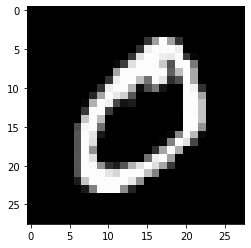

ValueError: ignored

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

print(xtrain.shape, ytrain.shape)

plt.figure()
plt.imshow(xtrain[1], cmap='gray')
plt.grid(False)
plt.show()

xtrain = xtrain/255.0
xtest = xtest/255.0

xtrain = xtrain.reshape(xtrain.shape[0], 28, 28, 1)
xtest = xtest.reshape(xtest.shape[0], 28, 28, 1)

k = tf.keras



model = k.Sequential()
model.add(k.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(k.layers.MaxPooling2D((2, 2)))
model.add(k.layers.Flatten())
model.add(k.layers.Dense(100, activation='relu'))
model.add(k.layers.Dense(10, activation='softmax'))

model.compile(optimizer=k.optimizers.SGD(lr=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=1)

predictions = model.predict(xtest)

print(model.evaluate(xtest, ytest)[1])

Predicted: 6(0.9999825)


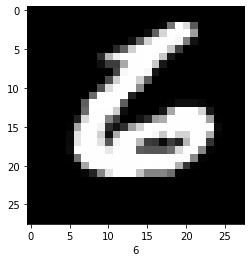

In [ ]:
imgnum = 9999
print('Predicted: ' + str(np.argmax(predictions[imgnum])) + '(' + str(np.max(predictions[imgnum])) + ')')
plt.figure()
plt.imshow(xtest[imgnum].reshape(28, 28), cmap='gray')
plt.grid(False)
plt.xlabel(str(ytest[imgnum].tolist().index(1)))
plt.show()